In [16]:
import math
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Working with Data & a Real Cost Function

#### Mean Squared Error: a cost function for regression problems

##### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
##### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
##### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [2]:
# https://pylie.com/howto/manhattan-cyclists/
temperature   = [22.2, 11.1, 2.8 , 3.7 , 1.2 , 3.1 , 12.8]
precipitation = [0.25, 3.81, 2.29, 1.27, 0   , 0   , 2.29]
brooklyn      = [1704, 827 , 526 , 521 , 1416, 1885, 1276]
manhattan     = [3126, 1646, 1232, 1067, 2617, 3329, 2581]
williamsburg  = [4115, 2565, 1695, 1440, 3081, 3856, 3282]
queenboro     = [2552, 1884, 1306, 1307, 2357, 2849, 2457]

In [3]:
# X = np.array((temperature, precipitation))
# X = X.transpose()

# y = np.array((brooklyn, manhattan, williamsburg, queenboro))
# y = y.transpose()

In [4]:
X = np.array((precipitation)).reshape(7,1)
y = np.array((brooklyn)).reshape(7,1)

In [5]:
model = lr()
model.fit(X, y)

print('theta0 = ', model.intercept_[0])
print('theta1 = ', model.coef_[0,0])

theta0 =  1520.8912306973025
theta1 =  -251.38633853492615


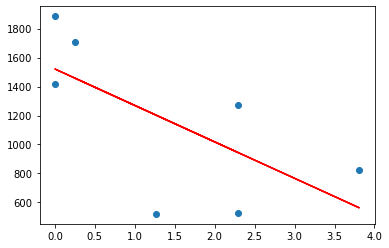

In [6]:
plt.plot(X, model.predict(X), color='red')
plt.scatter(X, y)
plt.show()

In [7]:
# plt.figure(figsize=(15,15))
# plt.grid()
# Y = [brooklyn, manhattan, williamsburg, queenboro]
# X = np.array((precipitation)).reshape(7,1)
# clr = ['red', 'purple', 'orange', 'green']
# for i in range(4):    
#     y = np.array((Y[i])).reshape(7,1)
#     model = lr()
#     model.fit(X, y)
#     plt.subplot(2,2,i+1)
#     plt.plot(X, model.predict(X), color=clr[i])
#     plt.scatter(X, y, color=clr[i])
#     plt.ylim(0,4200)
#     #plt.xlim(0,3.81)
# plt.show()

##### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $
##### $\theta_0 =  1520.8912306973027$ ,   $\theta_1 =  -251.3863385349262$
##### $\hat{y} = \theta_1 \cdot X + \theta_0$

In [8]:
y_hat = model.coef_*X + model.intercept_
print('y_hat= \n', y_hat)

y_hat= 
 [[1458.04464606]
 [ 563.10928088]
 [ 945.21651545]
 [1201.63058076]
 [1520.8912307 ]
 [1520.8912307 ]
 [ 945.21651545]]


In [9]:
def mse2(y, y_hat):
    return np.average((y-y_hat)**2, axis=0)

print('Manual 𝑀𝑆𝐸 =', mse2(y, y_hat))
print('Lib 𝑀𝑆𝐸 =', mse(y, y_hat))
print('Reg Lib 𝑀𝑆𝐸 =', mse(y, model.predict(X)))

Manual 𝑀𝑆𝐸 = [146018.27169554]
Lib 𝑀𝑆𝐸 = 146018.27169553985
Reg Lib 𝑀𝑆𝐸 = 146018.27169553985


In [10]:
n = 200
t0range = np.linspace(1400,1600, n)
t1range = np.linspace(-300, -200, n)
plott0, plott1 = np.meshgrid(t0range, t1range)
plotcost = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        yhat = plott0[i,j] + plott1[i,j] * X
        plotcost[i,j] = mse(y, yhat)

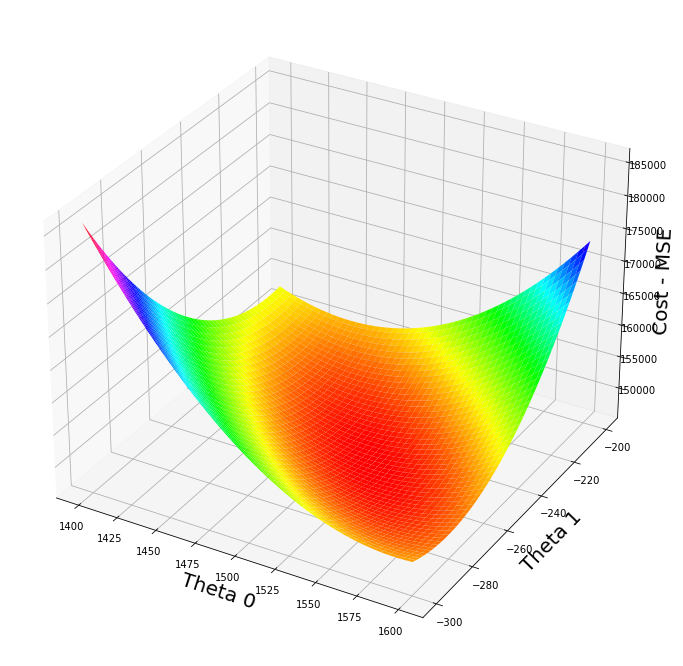

In [11]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plott0, plott1, plotcost, cmap=cm.hsv)
plt.show()

In [12]:
print('min value of plot cost = ', plotcost.min())
argmin = plotcost.argmin()
ij_min = np.unravel_index(indices=argmin, shape=plotcost.shape)
print('minimum index = ',ij_min)
print('min MSE for theta0 at plott0 = ',plott0[ij_min])
print('min MSE for theta1 at plott1 = ', plott1[ij_min])

min value of plot cost =  146018.31309815406
minimum index =  (97, 120)
min MSE for theta0 at plott0 =  1520.6030150753768
min MSE for theta1 at plott1 =  -251.25628140703517


### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

In [13]:
def gradt(x, y, theta):
    t0slope = -2 * np.average(y - theta[0] - theta[1] * x)
    t1slope = -2 * np.average((y - theta[0] - theta[1] * x) * x)
    return np.array((t0slope, t1slope))

In [73]:
h = 1e-2
tstart = np.array([1400,-300])
n_iter = 600
tlist = tstart.reshape(1,2)
mselist = mse(y,tstart[0] + tstart[1]*X)

for i in range(n_iter):
    tstart = tstart - h * gradt(X, y, tstart)
    tlist = np.concatenate((tlist, tstart.reshape(1,2)), axis=0)
    mselist = np.append(arr=mselist, values=mse(y,tstart[0] + tstart[1]*X))
        
print('min occurs at (theta0, theta1) =' ,tstart)
print('mse =', mse(y,tstart[0] + tstart[1]*X))

min occurs at (theta0, theta1) = [1520.28239949 -251.13288469]
mse = 146018.45029054795


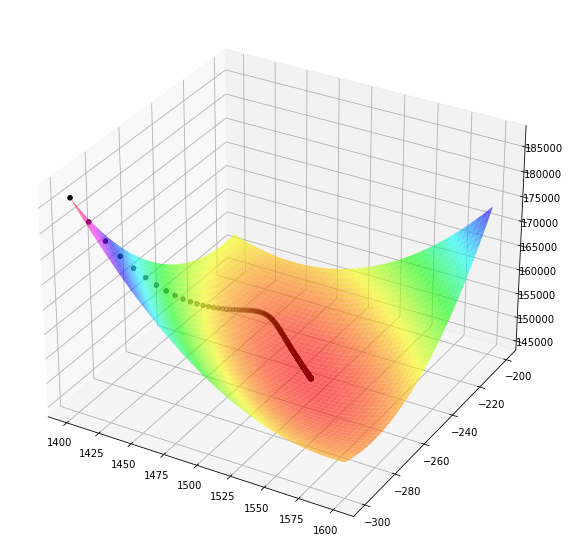

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(plott0, plott1, plotcost, cmap=cm.hsv, alpha=.6)
ax.scatter(tlist[:, 0], tlist[:, 1], mselist, color='black')
plt.show()